In [1]:
import os 

file_names = os.listdir('/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT')

# Define the file paths for the bands
bands = []
for file in file_names:
    bands.append('/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/'+file)
bands

['/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B3.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B2.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B1.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B5.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B4.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B6.TIF',
 '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_

In [2]:
import rasterio
import numpy as np

# Read and stack the bands
band_data = []
for band in bands:
    with rasterio.open(band) as src:
        band_data.append(src.read(1))

# Stack the bands into a single numpy array
stacked_array = np.stack(band_data, axis=0)

# Define the metadata for the output file
with rasterio.open(bands[0]) as src:
    meta = src.meta

meta.update(count=len(bands))

data_loc = '/Applications/miniconda3/Final Project/stacked_image.tif'
# Save the stacked bands into a new multi-band TIFF file
with rasterio.open(data_loc, 'w', **meta) as dst:
    for i in range(len(bands)):
        dst.write(stacked_array[i], i + 1)

print("Bands have been successfully stacked and saved")

Bands have been successfully stacked and saved


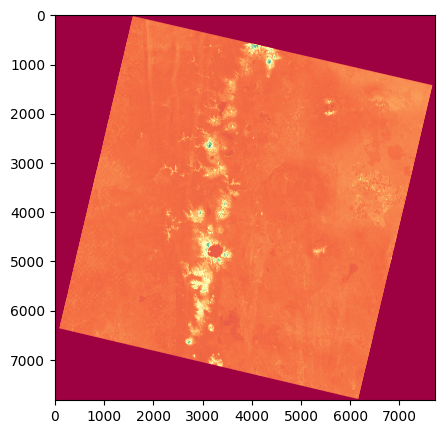

In [3]:
import matplotlib.pyplot as plt

file = rasterio.open(data_loc)
dataset = file.read()

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(dataset[0,:,:], cmap = 'Spectral')
plt.show()

In [4]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from pyrsgis import raster
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
from pyrsgis.convert import changeDimension
from shapely.geometry import mapping



In [5]:
# Define the bounding box coordinates for clipping
#minx, miny = 10000, 10000
#maxx, maxy = 20000, 20000
#bbox = box(minx, miny, maxx, maxy)
#geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=32610)

In [6]:
#import rioxarray as riox

#data_loc = '/Applications/miniconda3/Final Project/stacked_image.tif'
#label_loc = '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B2.TIF'

#src = rio.open(data_loc)

#from rasterio.plot import plotting_extent

# Plot the raster and the geometry for visualization
#fig, ax = plt.subplots()
#show(src, ax=ax)
#geo.plot(ax=ax, facecolor='none', edgecolor='red')
#plt.show()

In [7]:
data_loc = '/Applications/miniconda3/Final Project/stacked_image.tif'
label_loc = '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B2.TIF'

# Open the raster files
with rio.open(data_loc) as src:
    out_image, out_transform = mask(src, geo.geometry, crop=True)
    out_meta = src.meta.copy()

# Update the metadata for the clipped file
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Save the clipped raster file
clipped_file = "/Applications/miniconda3/Final Project/clipped_file.tif"
with rio.open(clipped_file, "w", **out_meta) as dest:
    dest.write(out_image)


NameError: name 'mask' is not defined

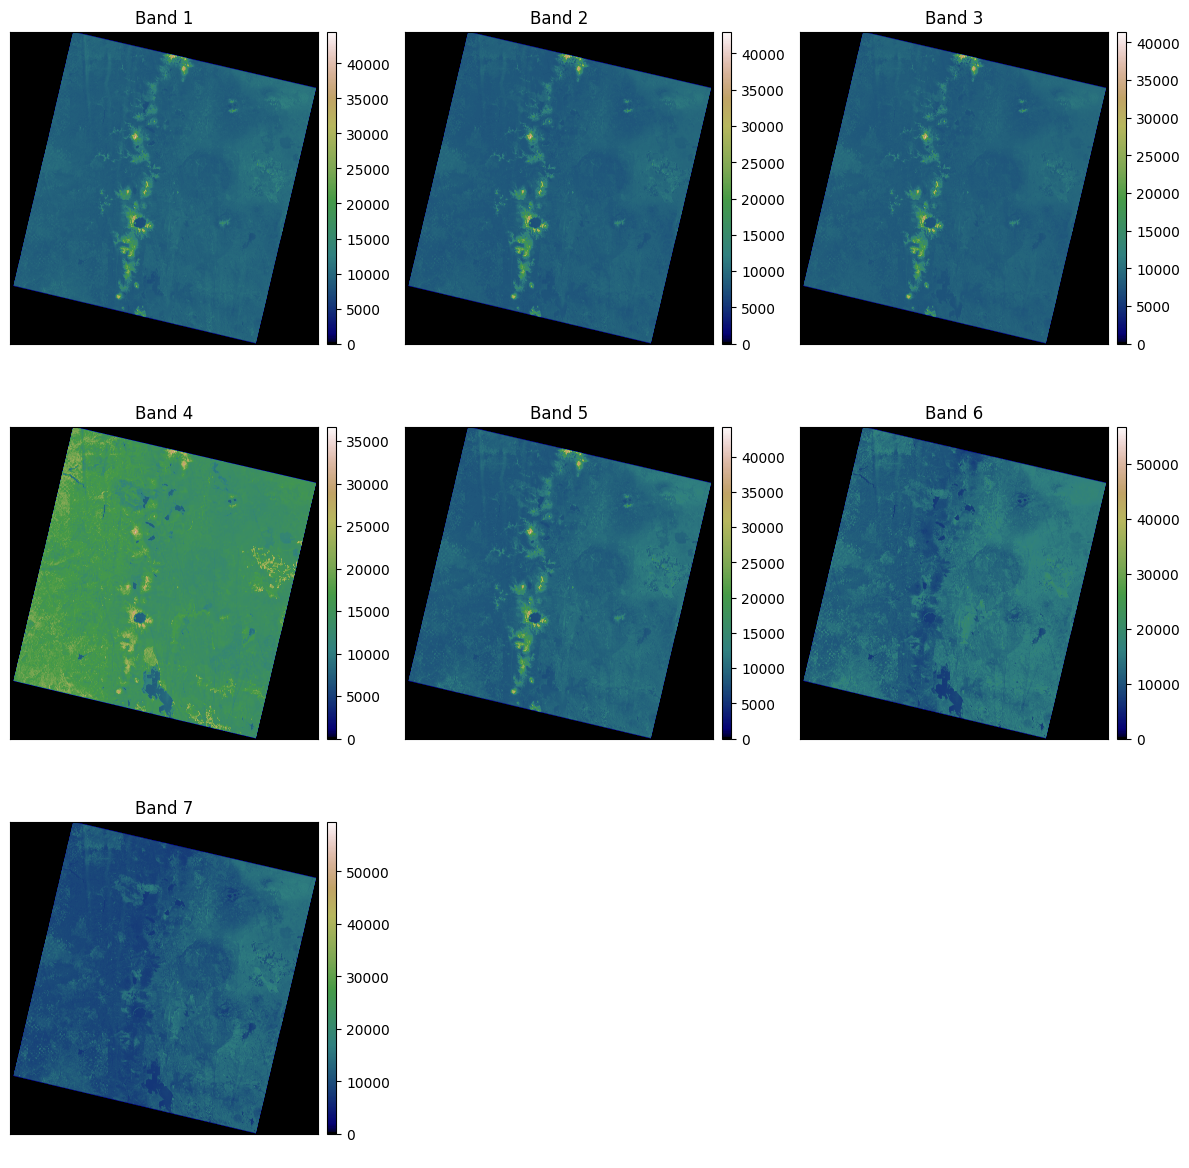

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [8]:
data_loc = '/Applications/miniconda3/Final Project/stacked_image.tif'
label_loc = '/Applications/miniconda3/Final Project/LC09_L2SP_045030_20240531_20240601_02_T1/BandsLSAT/LC09_L2SP_045030_20240531_20240601_02_T1_SR_B2.TIF'


#Reading training data and testing data
ds1, featuresTrain = raster.read(data_loc, bands='all')
ds2, featuresTest = raster.read(label_loc, bands ='all')

#Plotting each bands
ep.plot_bands(featuresTrain,cmap='gist_earth')

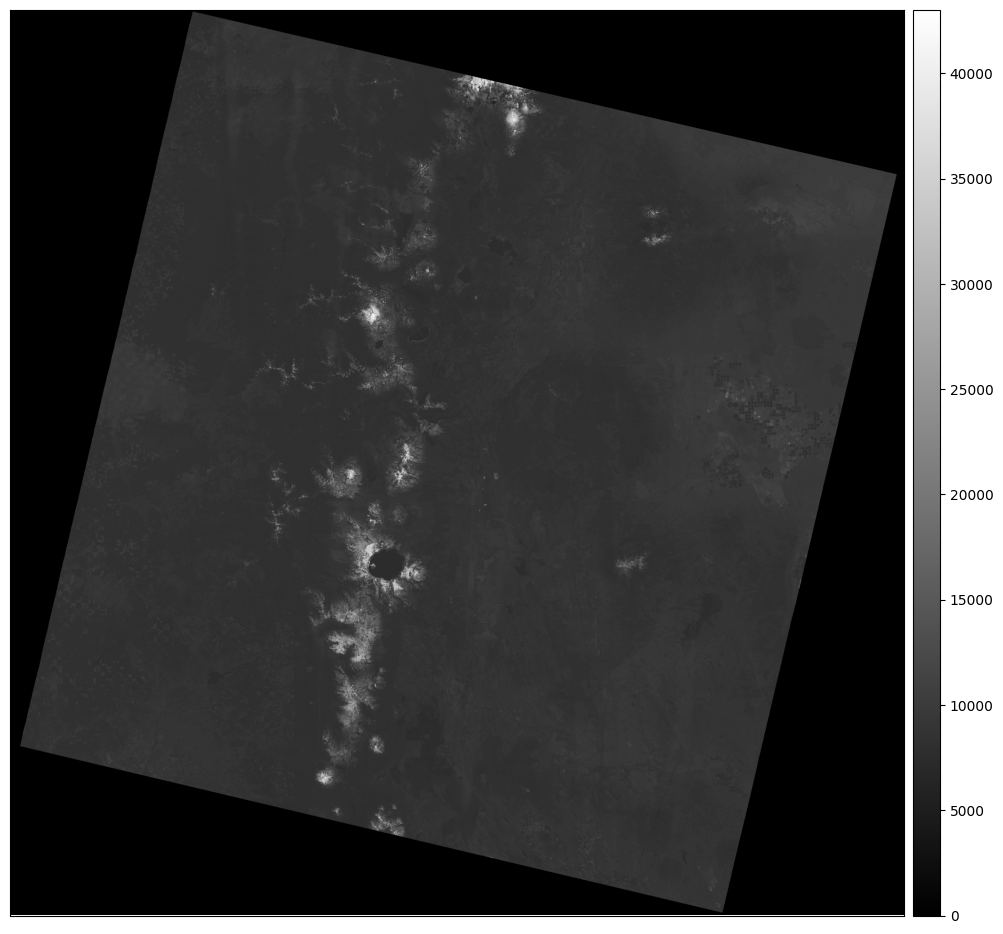

<Axes: >

In [9]:

#Plotting Labels
ep.plot_bands(featuresTest, cmap='gray')

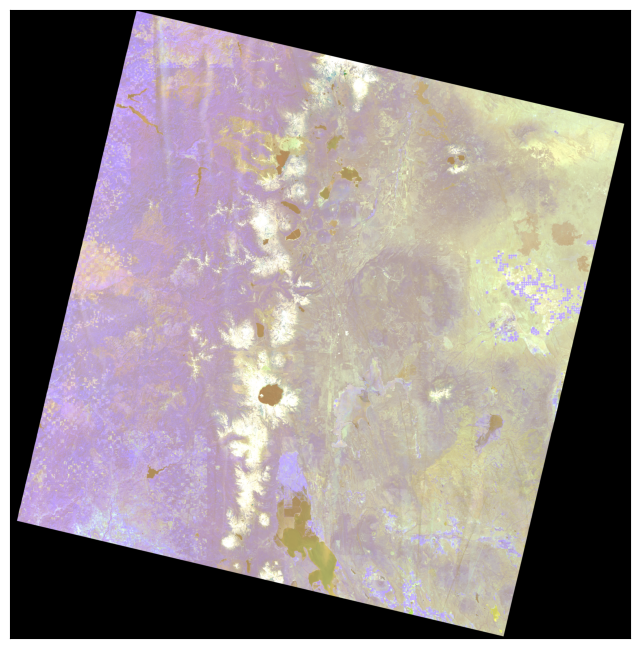

In [10]:
#Visualizing RGB composition
rgb = ep.plot_rgb(featuresTrain,rgb=(2,4,3),stretch=True,figsize=(8,10),)
plt.show()

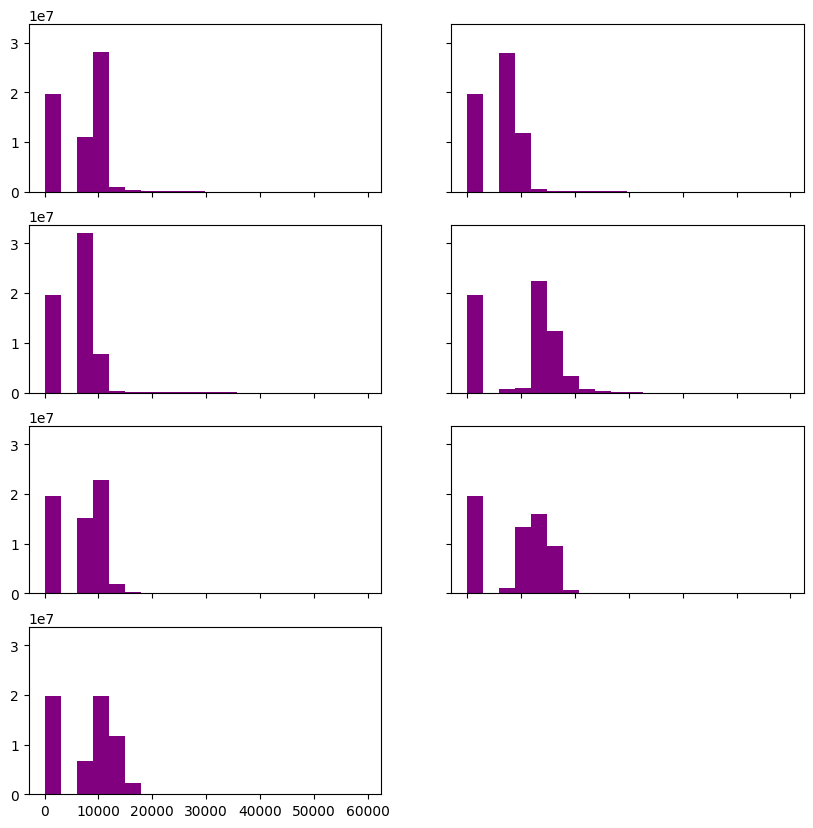

In [11]:
ep.hist(featuresTrain,colors='purple',figsize=(10,10))
plt.show()

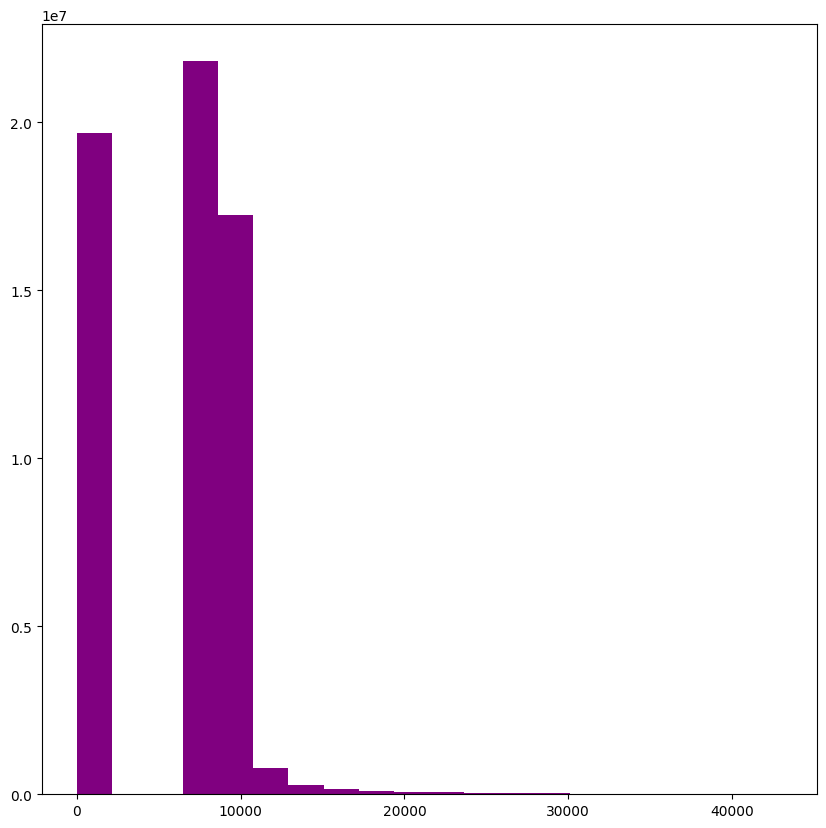

In [12]:
ep.hist(featuresTest,colors='purple',figsize=(10,10))
plt.show()

In [13]:
x = np.moveaxis(featuresTrain,0,-1)
print(x.shape)
y = featuresTest
print(y.shape)
y = changeDimension(y)
print(y.shape)

(7821, 7721, 7)
(7821, 7721)
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
(60385941,)


In [14]:
#data scaling
from sklearn.preprocessing import StandardScaler
x = x.reshape(-1,7)
print(x.shape)
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.shape)
print(y.shape)

(60385941, 7)
(60385941, 7)
(60385941,)


In [15]:
#Data splitting
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_scaled,y, test_size = 0.30)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(42270158, 7)
(18115783, 7)
(42270158,)
(18115783,)


In [16]:
xtrain = xtrain/255.0 
xtest=xtest/255.0
x_scaled=x_scaled/255.0

In [17]:
pip install gdal

Note: you may need to restart the kernel to use updated packages.


In [37]:
#importing modules and libraries
from sklearn.cluster import KMeans

import numpy as np

km = KMeans(n_clusters=5) # defining number of clusters 
km.fit(x_scaled)
km.predict(x_scaled)

out_data = km.labels_.reshape((7821, 7721))

In [38]:
# Example: Saving a list of numbers to a text file

numbers = [1, 2, 3, 4, 5]
with open('/Applications/miniconda3/Final Project/numbers.txt', 'w') as file:
       for number in numbers: file.write(f"{out_data}\n")  

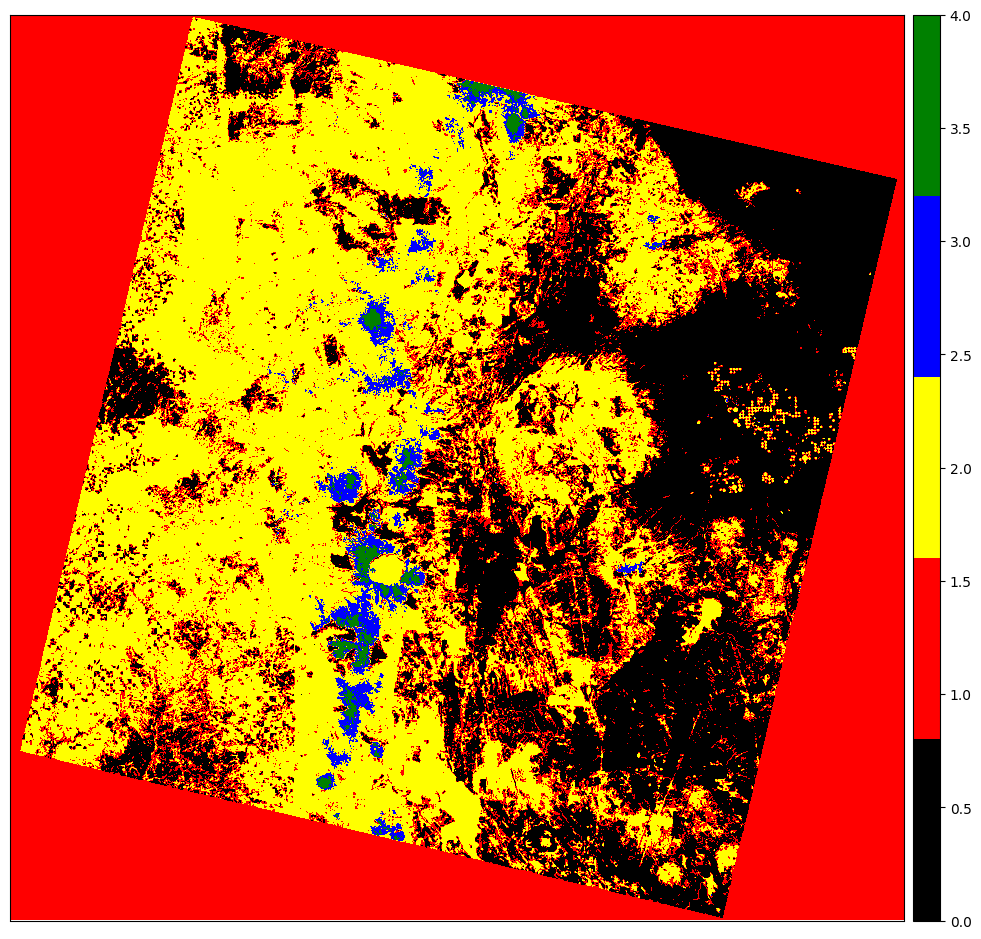

In [39]:
ep.plot_bands(out_data,cmap=ListedColormap(['black','red','yellow','blue','green']))
plt.show()


In [61]:
out_data[3437][2000]

0

In [40]:
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(xtrain,ytrain)
#knn_pred= knn.predict(xtest)

In [41]:
#print('Accuracy : {}'.format(accuracy_score(ytest,knn_pred)*100))

In [42]:
#print(classification_report(ytest,knn_pred))

In [62]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Dijkstra's algorithm to find the least weight path
def dijkstra(grid, start, end):
    rows, cols = len(grid), len(grid[0])
    distances = { (i, j): float('inf') for i in range(rows) for j in range(cols) }
    distances[start] = grid[start[0]][start[1]]
    priority_queue = [(grid[start[0]][start[1]], start)]
    came_from = {}
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        if current_node == end:
            break
        
        neighbors = get_neighbors(current_node, rows, cols)
        for neighbor in neighbors:
            distance = current_distance + grid[neighbor[0]][neighbor[1]]
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                came_from[neighbor] = current_node
    
    path = []
    if end in came_from or start == end:
        current = end
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()
    
    return path


In [65]:
# Get neighbors for a cell in the grid
def get_neighbors(position, rows, cols):
    i, j = position
    neighbors = []
    if i > 0: neighbors.append((i - 1, j))
    if i < rows - 1: neighbors.append((i + 1, j))
    if j > 0: neighbors.append((i, j - 1))
    if j < cols - 1: neighbors.append((i, j + 1))
    return neighbors


In [73]:
# Plot the grid and the path
def plot_path(grid, path):
   # Define the colormap
    cmap = ListedColormap(['black', 'red', 'yellow', 'blue', 'green'])

    rows, cols = len(grid), len(grid[0])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(grid, cmap=cmap, interpolation='none')

    # Plot the path
    for (i, j) in path:
        ax.plot(j, i, 'mo')  # Path in red
    
    ax.plot([j for (i, j) in path], [i for (i, j) in path], 'm-', linewidth=0.5)  # Line connecting path
    

    plt.show()



In [67]:
# Define start and end points
start = (3000, 3000)
end = (3535, 3535)

# Find the least weight path
path = dijkstra(out_data, start, end)


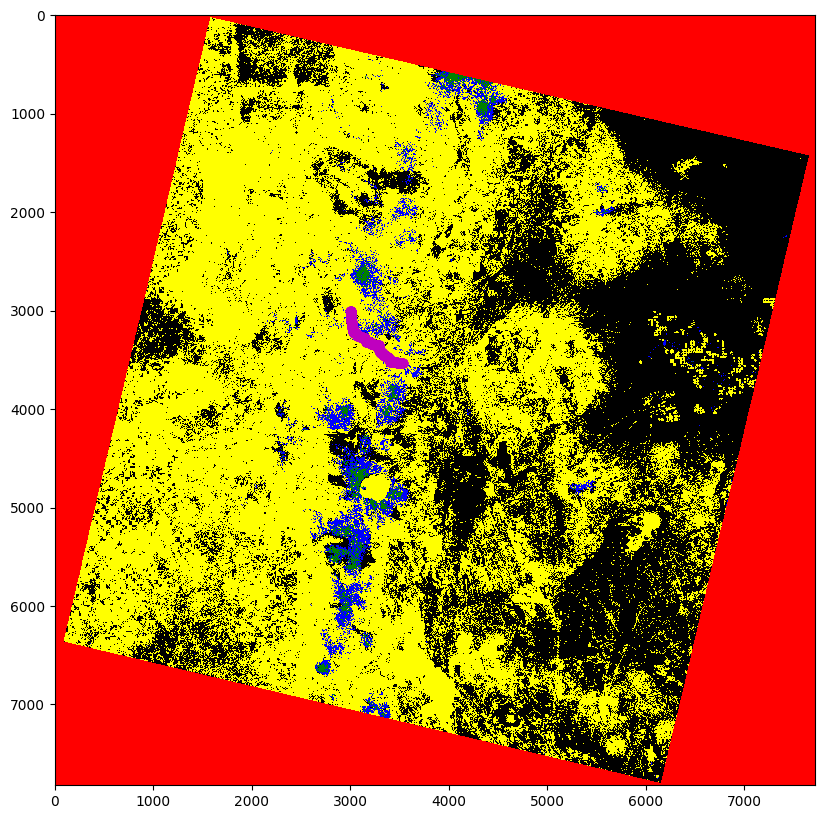

In [74]:
# Plot the path
plot_path(out_data, path)


In [79]:
# Plot the grid and the path, focusing on the area around the path
def plot_path2(grid, path):
    # Define the colormap
    cmap = ListedColormap(['black', 'red', 'yellow', 'blue', 'green'])
    
    # Determine the bounds of the area to plot
    path_i = [i for (i, j) in path]
    path_j = [j for (i, j) in path]
    allowance = 150
    min_i, max_i = max(min(path_i) - allowance, 0), min(max(path_i) + allowance, len(grid))
    min_j, max_j = max(min(path_j) - allowance, 0), min(max(path_j) + allowance, len(grid[0]))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(grid[min_i:max_i, min_j:max_j], cmap=cmap, interpolation='none', extent=[min_j, max_j, max_i, min_i])

    # Plot the path
    for (i, j) in path:
        ax.plot(j, i, 'mo')  # Path in pink
    
    ax.plot(path_j, path_i, 'm-', linewidth=1)  # Line connecting path in pink with thinner line

    plt.show()


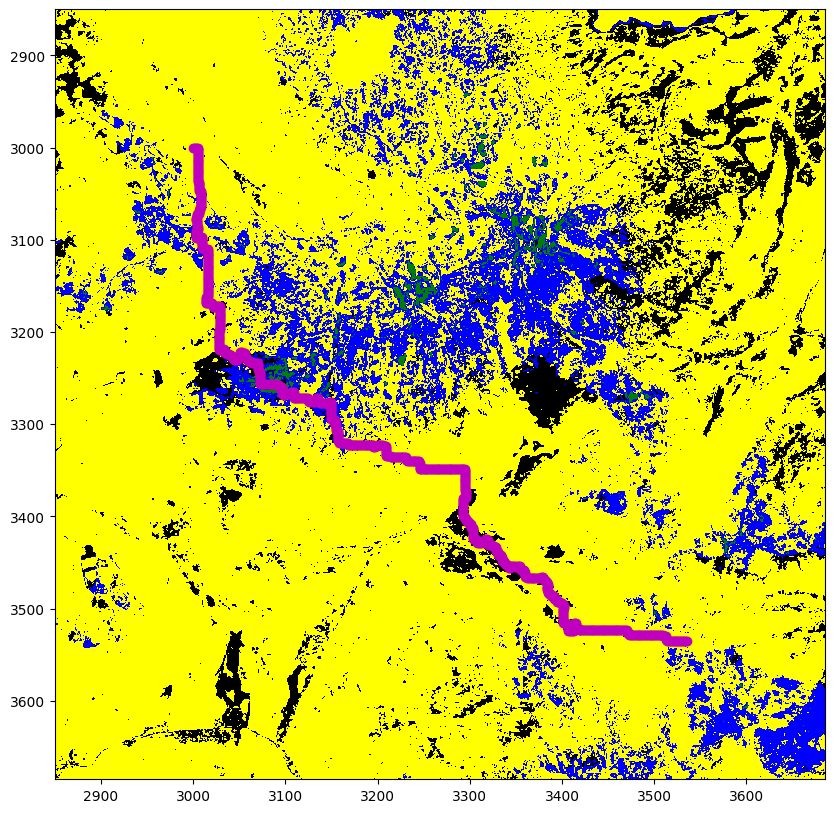

In [80]:
# Plot the path
plot_path2(out_data, path)